# perceptron
- A perceprtron models a neuron
- It receives inputs(corresponding to features)
- It sums those inputs, checks the result and produces an output
- It used to classify linearly separateable classes
- Often for binary classification

## The role of weights and bias
- The perceptron can have another input known as bias
- It is normal practice is to treat the bias as just another input
- The bias allow us to move the transfer function curve horizontally (left/right) along the input axis while leaving the shape/curvature unalterd
- The weights determins the slope

## Transfer (Activation) Functions
- The transfer function translates the input signals to output signals
- It uses a threshold to produce an output
- Four types of transfer functions are commonly used, Unit step(threshold), Sigmoid, pircewise linear and Gaussian

### Unit step

$
 f(n) =
  \begin{cases}
    0  & \, \text{if } \sum_{j}w_{j}x_{j} \leq threshold \\
    1  & \, \text{if } \sum_{j}w_{j}x_{j} \gt threshold \\
  \end{cases}
$

### Sigmoid

$
 f(x) = \dfrac{1}{1+e^{-\beta x}}
$

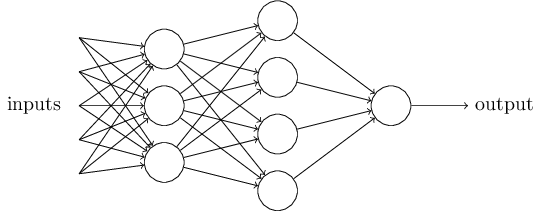


In this network, the first column of perceptrons - what we'll call the __first layer of perceptrons - is making three very simple decisions, by weighing the input evidence.__   
What about the perceptrons in the __second layer? Each of those perceptrons is making a decision by weighing up the results from the first layer of decision-making__.   
*In this way a perceptron in the second layer can make a decision at a more complex and more abstract level than perceptrons in the first layer. And even more complex decisions can be made by the perceptron in the third layer.*  
In this way, a many-layer network of perceptrons can engage in sophisticated decision making.

simplify the way we describe perceptrons  

__write $ \sum_{j}w_{j}x_{j} $ as a dot procudct $ w \cdot x \equiv \sum_{j}w_{j}x_{j} $__  
__The second change is to move the threshold to the other side of the inequality__

$
 output =
  \begin{cases}
    0  & \, \text{if } w \cdot x + b \leq 0 \\
    1  & \, \text{if } w \cdot x + b \gt 0 \\
  \end{cases}
$

In [1]:
# ----------
#
# In this exercise, you will update the perceptron class so that it can update
# its weights.
#
# Finish writing the update() method so that it updates the weights according
# to the perceptron update rule. Updates should be performed online, revising
# the weights after each data point.
#
# YOUR CODE WILL GO IN LINES 51 AND 59.
# ----------

import numpy as np


class Perceptron:
    """
    This class models an artificial neuron with step activation function.
    """

    def __init__(self, weights = np.array([1]), threshold = 0):
        """
        Initialize weights and threshold based on input arguments. Note that no
        type-checking is being performed here for simplicity.
        """
        self.weights = weights.astype(float)
        self.threshold = threshold

    def activate(self, values):
        """
        Takes in @param values, a list of numbers equal to length of weights.
        @return the output of a threshold perceptron with given inputs based on
        perceptron weights and threshold.
        """
        # First calculate the strength with which the perceptron fires
        strength = np.dot(values, self.weights)
        # Then return 0 or 1 depending on strength compared to threshold
        return int(strength > self.threshold)

    def update(self, values, train, eta = .1):
        """
        Takes in a 2D array @param values consisting of a LIST of inputs and a
        1D array @param train, consisting of a corresponding list of expected
        outputs. Updates internal weights according to the perceptron training
        rule using these values and an optional learning rate, @param eta.
        """
        # For each data point:
        for data_point in xrange(len(values)):
            # TODO: Obtain the neuron's prediction for the data_point --> values[data_point]
            prediction = self.activate(values[data_point])
            # Get the prediction accuracy calculated as (expected value - predicted value)
            # expected value = train[data_point], predicted value = prediction
            error = train[data_point] - prediction
            # TODO: update self.weights based on the multiplication of:
            # - prediction accuracy(error)
            # - learning rate(eta)
            # - input value(values[data_point])
            weight_update = (train[data_point] - prediction) * eta * values[data_point]
            self.weights += weight_update


def test():
    """
    A few tests to make sure that the perceptron class performs as expected.
    Nothing should show up in the output if all the assertions pass.
    """

    def sum_almost_equal(array1, array2, tol = 1e-6):
        return sum(abs(array1 - array2)) < tol

    p1 = Perceptron(np.array([1, 1, 1]), 0)
    p1.update(np.array([[2, 0, -3]]), np.array([1]))
    assert sum_almost_equal(p1.weights, np.array([1.2, 1, 0.7]))

    p2 = Perceptron(np.array([1, 2, 3]), 0)
    p2.update(np.array([[3, 2, 1], [4, 0, -1]]), np.array([0, 0]))
    assert sum_almost_equal(p2.weights, np.array([0.7, 1.8, 2.9]))

    p3 = Perceptron(np.array([3, 0, 2]), 0)
    p3.update(np.array([[2, -2, 4], [-1, -3, 2], [0, 2, 1]]), np.array([0, 1, 0]))
    assert sum_almost_equal(p3.weights, np.array([2.7, -0.3, 1.7]))


if __name__ == "__main__":
    test()

### Neural network are built out of components like perceptron units.  

Inputs to networks of perceptron look like a matrix of numerical values with classification for each row.  

A single perceptron is very much like linear regression. Therefore it should take the same kinds of inputs. However the outputs of perceptrons will generally be classifications, not numerical.  

### What information can we get as the output of a neural network
- A direct graph, the neural network itself  
- A signle-scalar valued number  
- The classification of a vector  
- A vector valued ouput for any vector input  